<a href="https://colab.research.google.com/github/nimrashaheen001/Programming_for_AI/blob/main/Assignment_01%20009%26011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

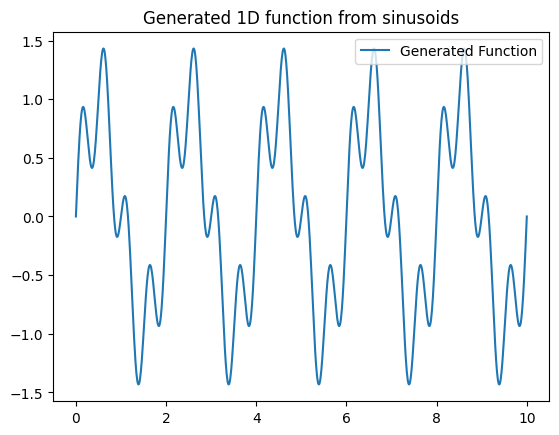

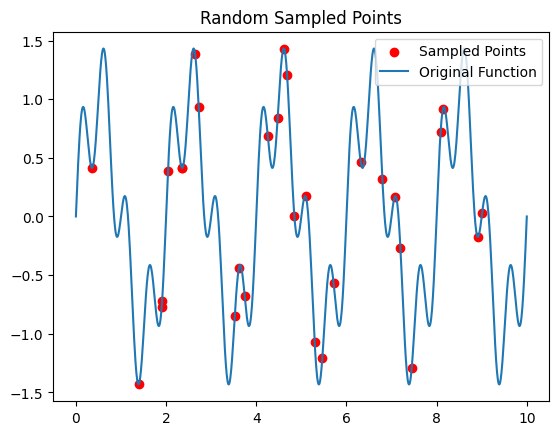

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf
from sklearn.model_selection import KFold

# Display the formula for multiquadric RBF
# The multiquadric RBF is defined as:
# φ(r) = sqrt(r^2 + ε^2)
# where r is the distance between points and ε is the shape parameter (epsilon).
# epsilon controls the 'spread' of the radial basis functions.

# Step 1: Generate a 1D function from random sinusoids
x = np.linspace(0, 10, 1000)  # Create a range of x values
f = np.sin(2 * np.pi * 0.5 * x) + 0.5 * np.sin(2 * np.pi * 2 * x)  # Function created from sinusoids

# Plot the generated function
plt.plot(x, f, label='Generated Function')
plt.title('Generated 1D function from sinusoids')
plt.legend()
plt.show()

# Step 2: Sample this function at a few dozen random locations
random_points = np.random.choice(x, size=30, replace=False)  # Randomly select 30 points from x
sampled_values = np.interp(random_points, x, f)  # Get the function values at these points

# Plot sampled points
plt.scatter(random_points, sampled_values, color='red', label='Sampled Points')
plt.plot(x, f, label='Original Function')
plt.title('Random Sampled Points')
plt.legend()
plt.show()

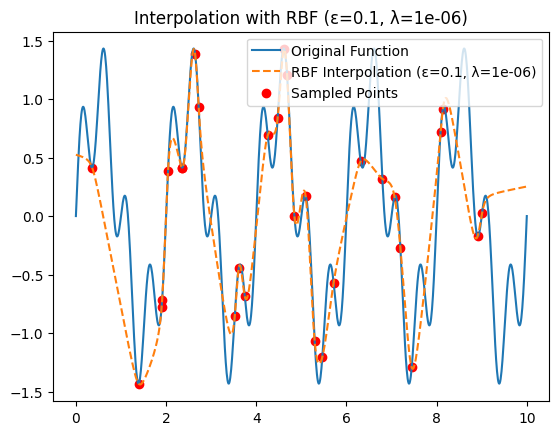

Mean Squared Error with ε=0.1, λ=1e-06: 0.2870665880735719


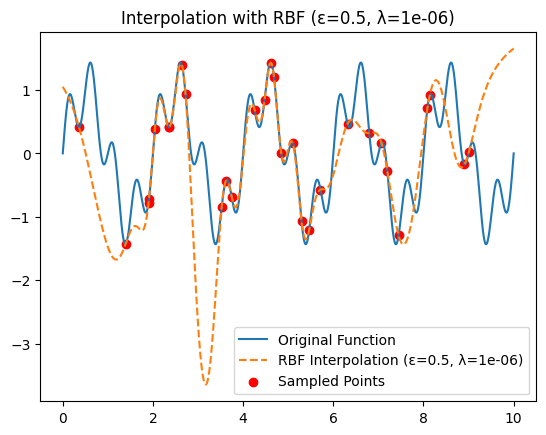

Mean Squared Error with ε=0.5, λ=1e-06: 1.0159623349113216


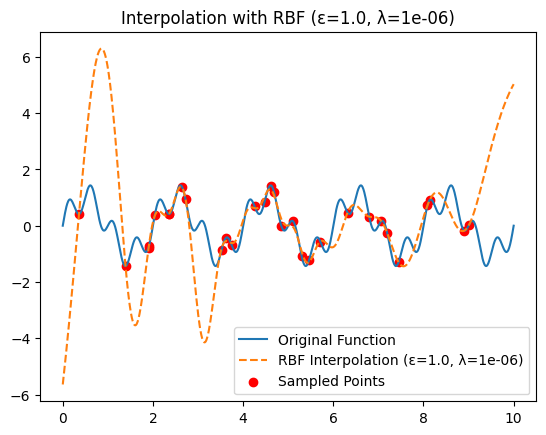

Mean Squared Error with ε=1.0, λ=1e-06: 4.397601133073591


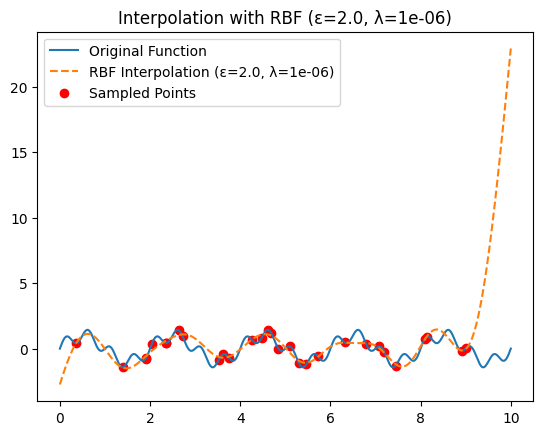

Mean Squared Error with ε=2.0, λ=1e-06: 14.052092147109345


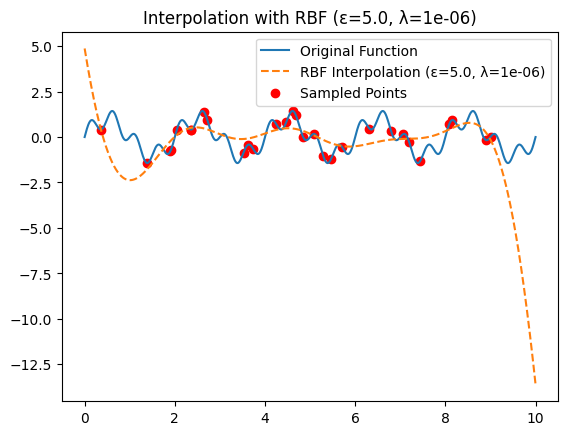

Mean Squared Error with ε=5.0, λ=1e-06: 4.747235524096362


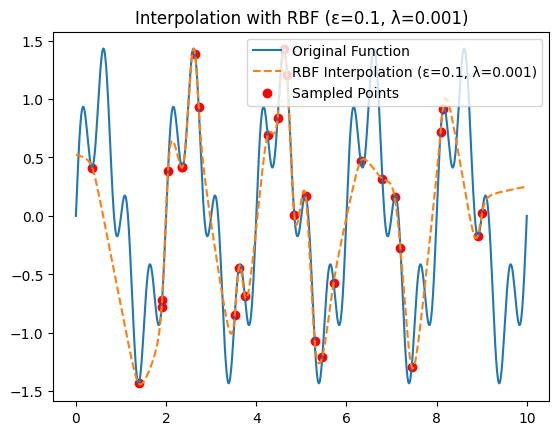

Mean Squared Error with ε=0.1, λ=0.001: 0.28795340917342993


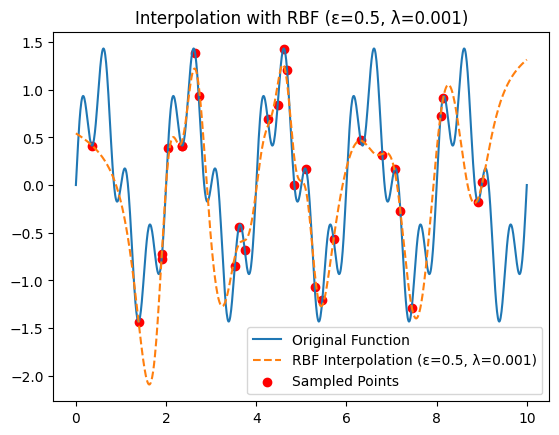

Mean Squared Error with ε=0.5, λ=0.001: 0.5138707954035663


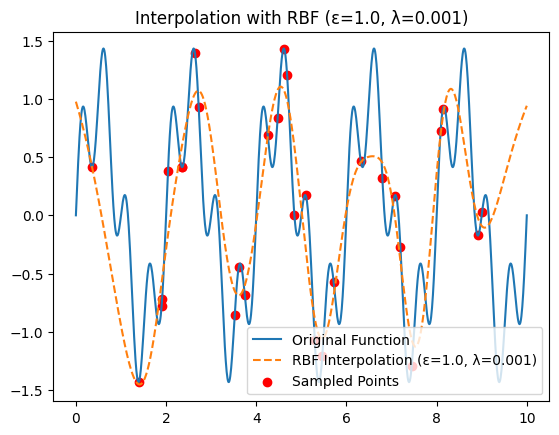

Mean Squared Error with ε=1.0, λ=0.001: 0.39431937822536567


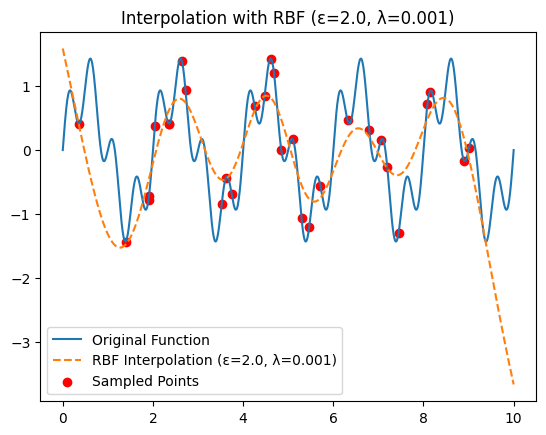

Mean Squared Error with ε=2.0, λ=0.001: 0.6225612182566415


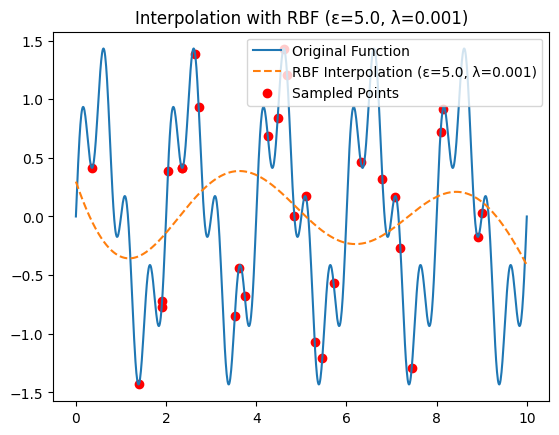

Mean Squared Error with ε=5.0, λ=0.001: 0.6302375155120492


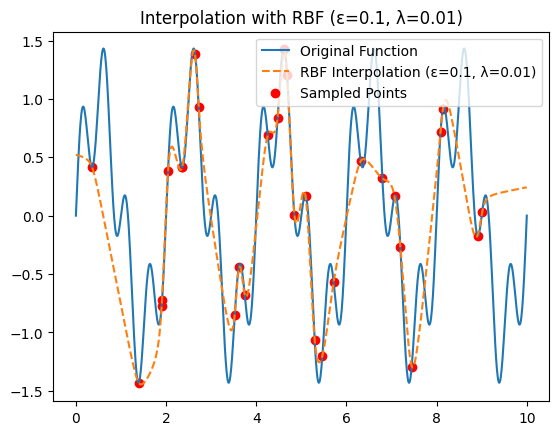

Mean Squared Error with ε=0.1, λ=0.01: 0.2894095008160184


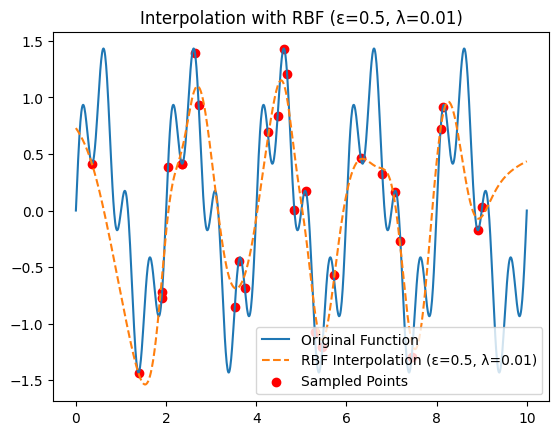

Mean Squared Error with ε=0.5, λ=0.01: 0.3473316496667744


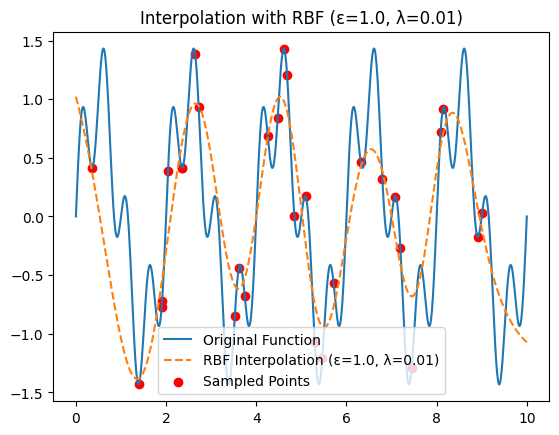

Mean Squared Error with ε=1.0, λ=0.01: 0.2866965491720409


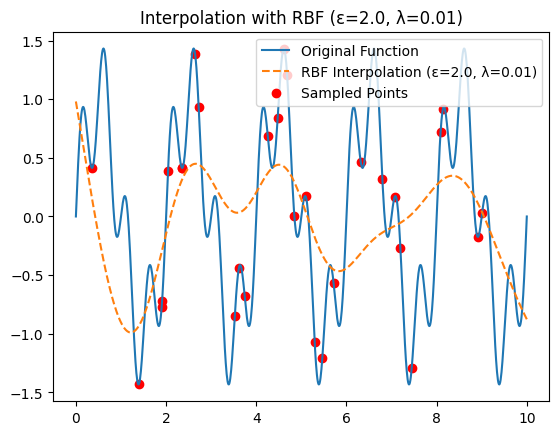

Mean Squared Error with ε=2.0, λ=0.01: 0.5234233282564605


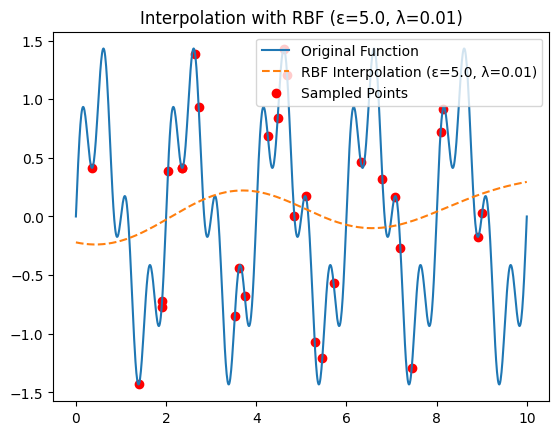

Mean Squared Error with ε=5.0, λ=0.01: 0.6871921597672338


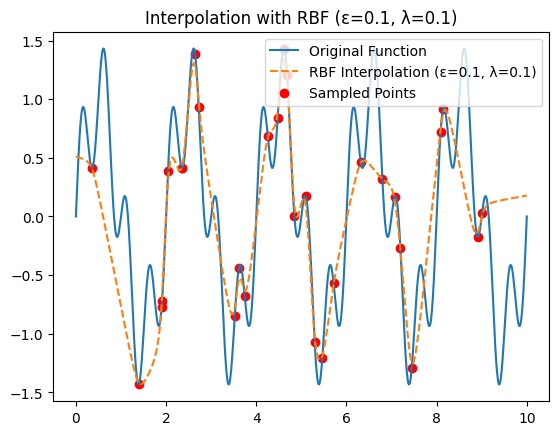

Mean Squared Error with ε=0.1, λ=0.1: 0.2873445809217005


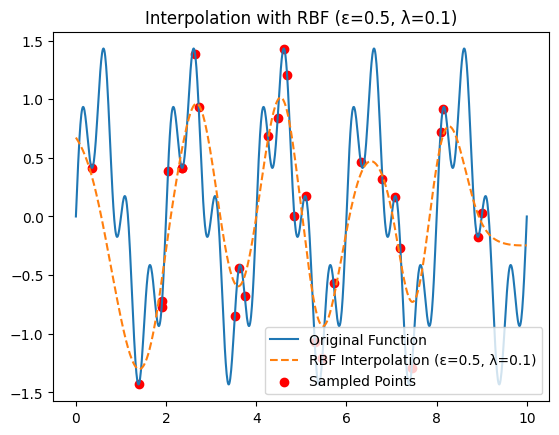

Mean Squared Error with ε=0.5, λ=0.1: 0.291786735100386


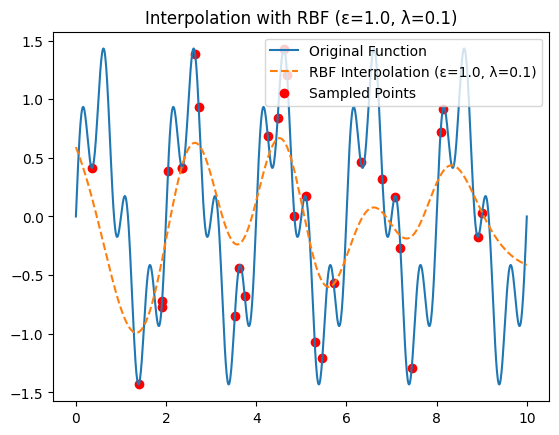

Mean Squared Error with ε=1.0, λ=0.1: 0.3978962940980261


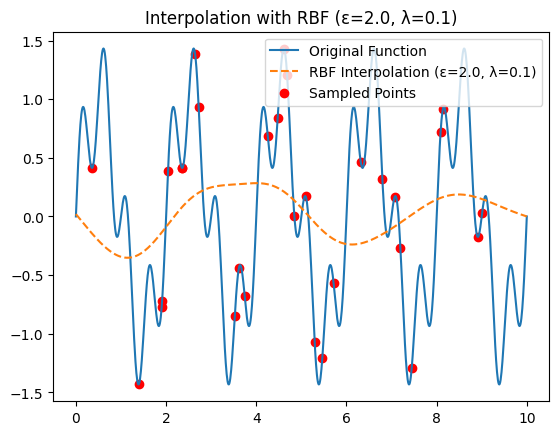

Mean Squared Error with ε=2.0, λ=0.1: 0.6414613226131705


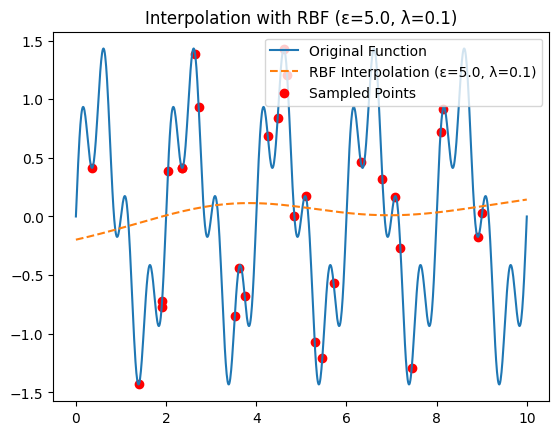

Mean Squared Error with ε=5.0, λ=0.1: 0.6564178241365889


In [ ]:
# Step 3: Fit a function using RBF with different hyperparameters (including regularization)
epsilons = [0.1, 0.5, 1.0, 2.0, 5.0]  # Epsilon values
lambdas = [1e-6, 1e-3, 0.01, 0.1]  # Regularization terms to try

for lambda_ in lambdas:
    for eps in epsilons:
        rbf = Rbf(random_points, sampled_values, function='multiquadric', epsilon=eps, smooth=lambda_)  # Regularization
        interpolated_values = rbf(x)
        error = np.mean((f - interpolated_values)**2)

        # Plot the interpolation results with different epsilon and lambda values
        plt.plot(x, f, label='Original Function')
        plt.plot(x, interpolated_values, label=f'RBF Interpolation (ε={eps}, λ={lambda_})', linestyle='dashed')
        plt.scatter(random_points, sampled_values, color='red', label='Sampled Points')
        plt.legend()
        plt.title(f'Interpolation with RBF (ε={eps}, λ={lambda_})')
        plt.show()

        print(f"Mean Squared Error with ε={eps}, λ={lambda_}: {error}")


Training Error with ε=0.1: 1.9382974002228514e-27
Validation Error with ε=0.1: 0.5147471351155385
Training Error with ε=0.5: 1.281475448841075e-22
Validation Error with ε=0.5: 1.7002727104741624
Training Error with ε=1.0: 5.516466428020757e-18
Validation Error with ε=1.0: 88.67406716504452
Training Error with ε=2.0: 4.5611581798969066e-09
Validation Error with ε=2.0: 38137.46042145225
Training Error with ε=5.0: 3.018434975170257
Validation Error with ε=5.0: 5058805.334797635


/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_rbf.py:268: LinAlgWarning: Ill-conditioned matrix (rcond=6.79266e-19): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_rbf.py:268: LinAlgWarning: Ill-conditioned matrix (rcond=1.20786e-18): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_rbf.py:268: LinAlgWarning: Ill-conditioned matrix (rcond=1.7628e-18): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_rbf.py:268: LinAlgWarning: Ill-conditioned matrix (rcond=1.2128e-18): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_rbf.py:268: LinAlgWarning: Ill-conditioned matrix (rcond=1.53071e-18): result may not be accurate.
  self.nodes = linalg.solve(self

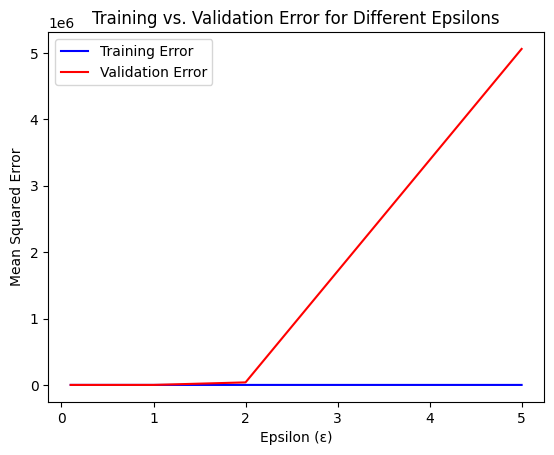

In [ ]:
# Step 5b: Automated Cross-Validation for Training and Validation Errors
def cross_validate_rbf_train_val(random_points, sampled_values, x, f, epsilon):
    kf = KFold(n_splits=5)
    train_errors = []
    val_errors = []

    for train_index, test_index in kf.split(random_points):
        # Split into training and testing sets
        train_points, test_points = random_points[train_index], random_points[test_index]
        train_values, test_values = sampled_values[train_index], sampled_values[test_index]

        # Train the RBF model with a specific epsilon
        rbf = Rbf(train_points, train_values, function='multiquadric', epsilon=epsilon)

        # Predict on both train and test sets
        predicted_train = rbf(train_points)
        predicted_test = rbf(test_points)

        # Calculate errors
        train_error = np.mean((predicted_train - train_values)**2)
        val_error = np.mean((predicted_test - test_values)**2)

        train_errors.append(train_error)
        val_errors.append(val_error)

    return np.mean(train_errors), np.mean(val_errors)

# Now plot training and validation error like in Figure 4.5
train_errors = []
val_errors = []

for eps in epsilons:
    train_error, val_error = cross_validate_rbf_train_val(random_points, sampled_values, x, f, epsilon=eps)
    train_errors.append(train_error)
    val_errors.append(val_error)
    print(f"Training Error with ε={eps}: {train_error}")
    print(f"Validation Error with ε={eps}: {val_error}")

# Plot training and validation errors
plt.plot(epsilons, train_errors, label='Training Error', color='blue')
plt.plot(epsilons, val_errors, label='Validation Error', color='red')
plt.xlabel('Epsilon (ε)')
plt.ylabel('Mean Squared Error')
plt.title('Training vs. Validation Error for Different Epsilons')
plt.legend()
plt.show()


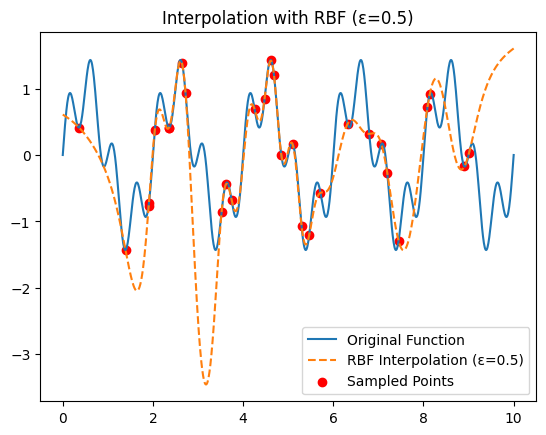

Mean Squared Error with ε=0.5: 0.8781223339034189


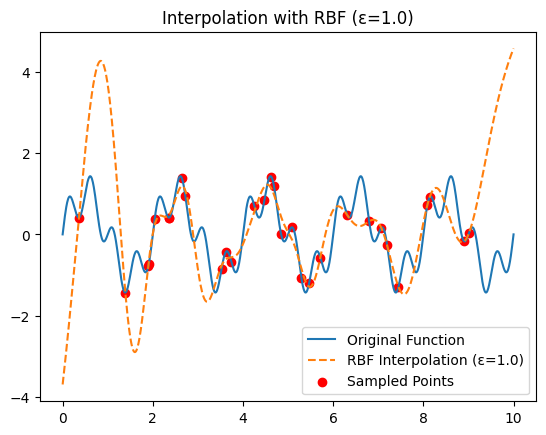

Mean Squared Error with ε=1.0: 2.482947099775827


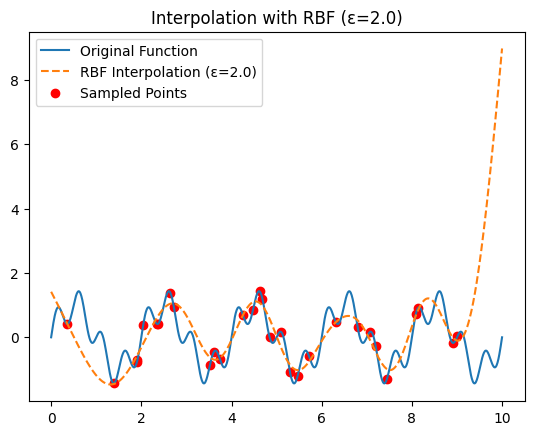

Mean Squared Error with ε=2.0: 2.519411535396691


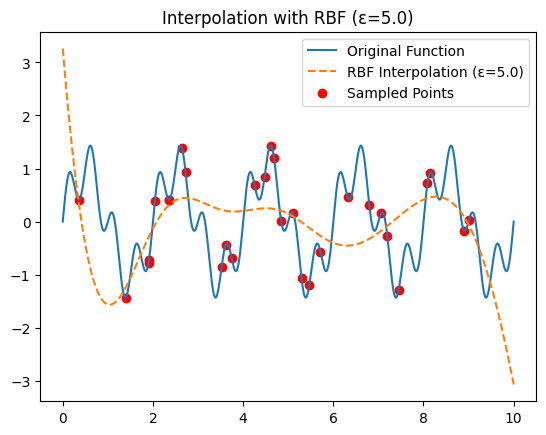

Mean Squared Error with ε=5.0: 0.9126948520881379


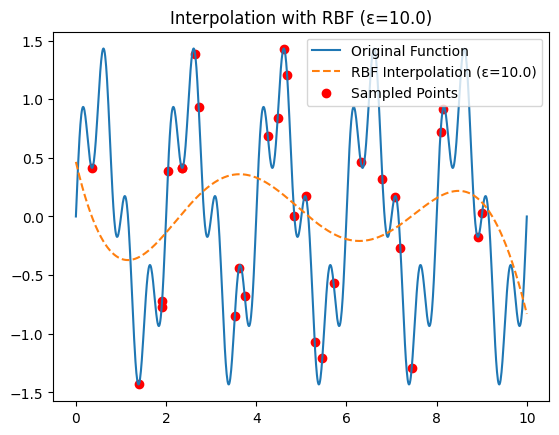

Mean Squared Error with ε=10.0: 0.6111682997757539


In [ ]:
# Step 3: Fit a function using RBF with different hyperparameters (including regularization)
# Try larger epsilon values to stabilize the interpolation
epsilons = [0.5, 1.0, 2.0, 5.0, 10.0]  # Larger epsilon values to avoid ill-conditioned matrix

for eps in epsilons:
    rbf = Rbf(random_points, sampled_values, function='multiquadric', epsilon=eps, smooth=1e-5)  # Add small smoothing
    interpolated_values = rbf(x)
    error = np.mean((f - interpolated_values)**2)

    # Plot the interpolation results with different epsilon values
    plt.plot(x, f, label='Original Function')
    plt.plot(x, interpolated_values, label=f'RBF Interpolation (ε={eps})', linestyle='dashed')
    plt.scatter(random_points, sampled_values, color='red', label='Sampled Points')
    plt.legend()
    plt.title(f'Interpolation with RBF (ε={eps})')
    plt.show()

    print(f"Mean Squared Error with ε={eps}: {error}")


Training Error with ε=0.5, λ=1e-06: 2.394549466557686e-06
Validation Error with ε=0.5, λ=1e-06: 1.1207553203140868
Training Error with ε=1.0, λ=1e-06: 0.002267359471897901
Validation Error with ε=1.0, λ=1e-06: 16.4772143873807
Training Error with ε=2.0, λ=1e-06: 0.04059742407710598
Validation Error with ε=2.0, λ=1e-06: 30.210823782206546
Training Error with ε=5.0, λ=1e-06: 0.28426320798134025
Validation Error with ε=5.0, λ=1e-06: 20.114826029668123
Training Error with ε=10.0, λ=1e-06: 0.5040618505569988
Validation Error with ε=10.0, λ=1e-06: 2.4900007865284683
Training Error with ε=0.5, λ=0.001: 0.006948993616735526
Validation Error with ε=0.5, λ=0.001: 0.806447761890073
Training Error with ε=1.0, λ=0.001: 0.04643182182526881
Validation Error with ε=1.0, λ=0.001: 1.7733673499121327
Training Error with ε=2.0, λ=0.001: 0.12511236574146
Validation Error with ε=2.0, λ=0.001: 2.8477253569156336
Training Error with ε=5.0, λ=0.001: 0.529384903737162
Validation Error with ε=5.0, λ=0.001: 1.478

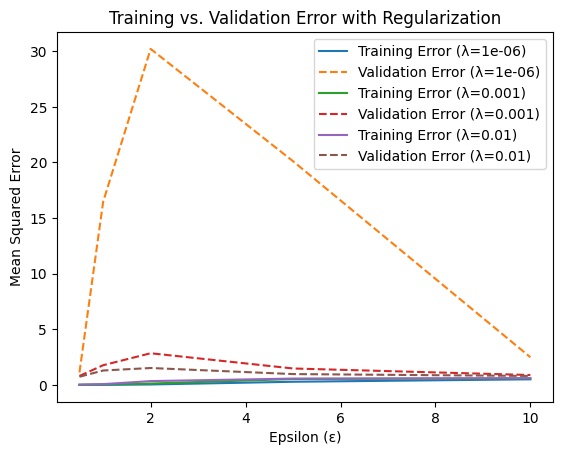

In [ ]:
from scipy.linalg import solve

# Step 5b: Regularized Cross-Validation for Training and Validation Errors
def cross_validate_rbf_train_val_regularized(random_points, sampled_values, epsilon, lambda_=1e-5):
    kf = KFold(n_splits=5)
    train_errors = []
    val_errors = []

    for train_index, test_index in kf.split(random_points):
        # Split into training and testing sets
        train_points, test_points = random_points[train_index], random_points[test_index]
        train_values, test_values = sampled_values[train_index], sampled_values[test_index]

        # Create RBF interpolation model
        rbf = Rbf(train_points, train_values, function='multiquadric', epsilon=epsilon, smooth=lambda_)

        # Predict on both train and test sets
        predicted_train = rbf(train_points)
        predicted_test = rbf(test_points)

        # Calculate errors
        train_error = np.mean((predicted_train - train_values)**2)
        val_error = np.mean((predicted_test - test_values)**2)

        train_errors.append(train_error)
        val_errors.append(val_error)

    return np.mean(train_errors), np.mean(val_errors)

train_errors_dict = {}  # Dictionary to store train errors for each lambda
val_errors_dict = {}    # Dictionary to store val errors for each lambda

# Reset the errors list for each lambda
for lambda_ in lambdas:
    train_errors_dict[lambda_] = []
    val_errors_dict[lambda_] = []

    for eps in epsilons:
        train_error, val_error = cross_validate_rbf_train_val_regularized(random_points, sampled_values, epsilon=eps, lambda_=lambda_)
        train_errors_dict[lambda_].append(train_error)
        val_errors_dict[lambda_].append(val_error)
        print(f"Training Error with ε={eps}, λ={lambda_}: {train_error}")
        print(f"Validation Error with ε={eps}, λ={lambda_}: {val_error}")

# Plot training and validation errors for each lambda
for lambda_ in lambdas:
    plt.plot(epsilons, train_errors_dict[lambda_], label=f'Training Error (λ={lambda_})', linestyle='solid')
    plt.plot(epsilons, val_errors_dict[lambda_], label=f'Validation Error (λ={lambda_})', linestyle='dashed')

plt.xlabel('Epsilon (ε)')
plt.ylabel('Mean Squared Error')
plt.title('Training vs. Validation Error with Regularization')
plt.legend()
plt.show()
